
Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3118  , p=0.5796  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.3347  , p=0.5629  , df=1
likelihood ratio test: chi2=0.3334  , p=0.5637  , df=1
parameter F test:         F=0.3118  , p=0.5796  , df_denom=41, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0631  , p=0.1411  , df_denom=38, df_num=2
ssr based chi2 test:   chi2=4.6691  , p=0.0969  , df=2
likelihood ratio test: chi2=4.4326  , p=0.1090  , df=2
parameter F test:         F=2.0631  , p=0.1411  , df_denom=38, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8290  , p=0.1599  , df_denom=35, df_num=3
ssr based chi2 test:   chi2=6.5843  , p=0.0864  , df=3
likelihood ratio test: chi2=6.1165  , p=0.1061  , df=3
parameter F test:         F=1.8290  , p=0.1599  , df_denom=35, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3989  , p=0.2566  , df_d

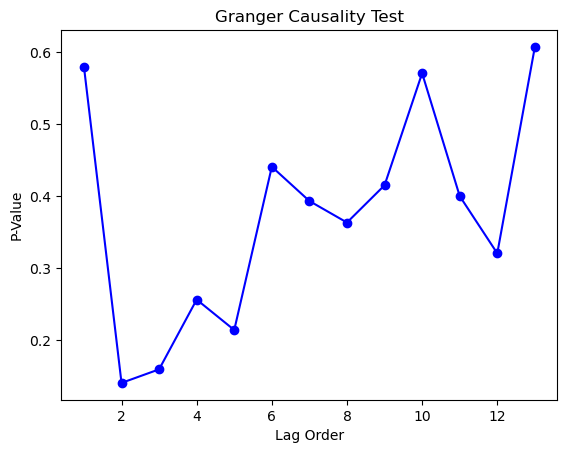

In [25]:
# Granger causality test: symmetric; Does not distinguish between X causing Y or Y causing X

# checking whether the past values of the 'tweets' time series (X) contain information
# that helps predict the future values of the 'steam' time series (Y)

# Assess whether including information from the 'tweets' series improves the prediction accuracy of the 'steam' series.

# Need to change the max_lag depend on how big/small the data is.

import warnings
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# tweets data from total_tweets.py
# with PATH = "../s2465795/project_data/twitter/2020/01/01/*/*.json.bz2"
# steam data from total_steam_review.py
# with PATH = "../s2465795/project_data/steam_reviews.csv"
http://localhost:8890/notebooks/granger_causality.ipynb#

# Load the CSV files into Pandas DataFrames
tweets_df = pd.read_csv('Desktop/DataScienceAndTechnologies/tweets.csv')
steam_reviews_df = pd.read_csv('Desktop/DataScienceAndTechnologies/steam.csv')

# Assuming 'date' and 'time_created' are the time indices in the respective dataframes
# Convert the 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
steam_reviews_df['time_created'] = pd.to_datetime(steam_reviews_df['time_created'])

# Sort both DataFrames based on the datetime columns
tweets_df.sort_values('date', inplace=True)
steam_reviews_df.sort_values('time_created', inplace=True)

# Merge based on the nearest date
merged_df = pd.merge_asof(tweets_df, steam_reviews_df, left_on='date', right_on='time_created', direction='nearest')

# Drop any NaN values that might result from the merge
merged_df = merged_df.dropna()

# Select the columns to be used in the Granger Causality Test
data_columns = ['count_x', 'count_y']  # Assuming these are the columns containing counts
data = merged_df[data_columns]

# Define the maximum lag to be considered in the test
max_lag = 13
min_obs = 2 * (max_lag + 1)  # Minimum required observations for the chosen maximum lag

if len(data) < min_obs:
    print(f"Insufficient observations for a maximum lag of {max_lag}. Dataset requires at least {min_obs} observations.")
else:
    # Suppress FutureWarning for verbose
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Perform the Granger Causality Test
        results = grangercausalitytests(data, max_lag, verbose=True)

    # Access the results programmatically if needed
    for i in range(1, max_lag + 1):
        p_value = results[i][0]['ssr_ftest'][1]
        print(f'Lag {i}: p-value = {p_value}')

    # Visualize the test results (optional)
    lags = range(1, max_lag + 1)
    p_values = [results[i][0]['ssr_ftest'][1] for i in range(1, max_lag + 1)]

    plt.plot(lags, p_values, marker='o', linestyle='-', color='b')
    plt.title('Granger Causality Test')
    plt.xlabel('Lag Order')
    plt.ylabel('P-Value')
    plt.show()

In [24]:
# Assess whether including information from the 'tweets' series
# improves the prediction accuracy of the 'steam' series per game

# Need to change the max_lag depend on how big/small the data is.

import warnings
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Load the CSV files into Pandas DataFrames
tweets_df = pd.read_csv('Desktop/DataScienceAndTechnologies/tweets.csv')
steam_reviews_df = pd.read_csv('Desktop/DataScienceAndTechnologies/steam.csv')


# Assuming 'date' and 'time_created' are the time indices in the respective dataframes
# Convert the 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
steam_reviews_df['time_created'] = pd.to_datetime(steam_reviews_df['time_created'])

# Sort both DataFrames based on the datetime columns
tweets_df.sort_values('date', inplace=True)
steam_reviews_df.sort_values('time_created', inplace=True)

# Merge based on the nearest date
merged_df = pd.merge_asof(tweets_df, steam_reviews_df, left_on='date', right_on='time_created', direction='nearest')

# Drop any NaN values that might result from the merge
merged_df = merged_df.dropna()

# Select the columns to be used in the Granger Causality Test
data_columns = ['count_x', 'count_y']  # Assuming these are the columns containing counts

# Get unique game names
unique_games = merged_df['game_name'].unique()

# Define the maximum lag to be considered in the test
max_lag = 2
min_obs = 2 * (max_lag + 1)  # Minimum required observations for the chosen maximum lag

# Suppress FutureWarning for verbose
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Loop through each unique game
    for game_name in unique_games:
        # Filter data for the specific game
        game_df = merged_df[merged_df['game_name'] == game_name]

        # Check if there are sufficient observations for the chosen maximum lag
        if len(game_df) >= min_obs:
            # Perform the Granger Causality Test
            results = grangercausalitytests(game_df[data_columns], max_lag, verbose=False)

            # Access the results programmatically if needed
            for lag in range(1, max_lag + 1):
                p_value = results[lag][0]['ssr_ftest'][1]
                print(f'{game_name}, Lag {lag}: p-value = {p_value}')
        else:
            print(f"Insufficient observations for {game_name}. Dataset requires at least {min_obs} observations.")


Rocket League, Lag 1: p-value = 0.7839680317454345
Rocket League, Lag 2: p-value = 0.974172852654705
Grand Theft Auto V, Lag 1: p-value = 0.9291625997275557
Grand Theft Auto V, Lag 2: p-value = 0.9767047827887203
PLAYERUNKNOWN'S BATTLEGROUNDS, Lag 1: p-value = 0.3341338908341893
PLAYERUNKNOWN'S BATTLEGROUNDS, Lag 2: p-value = 0.7960070590367696
Terraria, Lag 1: p-value = 0.7589290447953836
Terraria, Lag 2: p-value = 0.7959079655032208
Insufficient observations for DARK SOULS™ III. Dataset requires at least 6 observations.
